<a href="https://colab.research.google.com/github/davidkim0523/Python-Basics-and-Data-Science/blob/main/4_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 알고리즘 (Algorithms)

우리는 지금까지 파이썬으로 프로그래밍하는 방법과 코드를 더 파이썬스럽게 만들 수 있는 몇 가지 방법에 대해 배웠습니다. 그러나 프로그래밍이라는 것은 본질적으로 컴퓨터가 우리를 위해 작동하도록 만드는 것뿐만 아니라 컴퓨터가 수행해야 하는 작업의 양을 최적화하는 것까지를 포함합니다. 이와 관련하여 우리가 고려할 수 있는 여러 유형의 작업들이 존재합니다. 여기서 우리는 그 중에서도 코드의 세 가지 주요 병목 현상들에 대해서 살펴볼 예정입니다.

1. 계산 복잡도(**Computational Complexity**) - 얼마나 많은 수의 지시사항이 실행되어야 하는가??
2. 메모리 니즈(**Memory Needs**) - 얼마나 많은 메모리가 필요한가?
3. 입출력(**I/O**) - 얼마나 많은 입력과 출력, 혹은 얼마나 많은 수의 네트워크가 필요한가?

알고리즘(**algorithms**)이라는 것은 쉽게 말해 문제를 해결하는 절차입니다. 이것은 일련의 작업을 설명하고 수행할 때 문제에 대한 솔루션을 제공합니다. 많은 유형의 알고리즘들이 있으며, 일부는 솔루션을 찾는 것이 보장되나 또다른 일부는 그렇지 않기도 합니다. 우리는 위에 나열된 세 가지 병목 현상(및 기타)의 관점에서 알고리즘의 성능을 이해하는 데 관심이 있습니다. 이러한 알고리즘을 분석하려면 알고리즘이 **문제 크기의 함수**로 작동하는 방식을 이해하는 몇 가지 도구들이 필요합니다.

## 빅오 (Big O)

특정 알고리즘의 복잡성을 정량화하기 위해서는 우선 문제의 크기에 따라 알고리즘이 어떻게 커지는가를 고려해야 합니다. 여기서 우리는 단순히 1차원적인 문제만 고려할 것이므로, $N$로 표시되는 단일 숫자로 알고리즘을 계량화시킬 수 있습니다. 복잡성이라는 것은 문제 자체에 기인하는 것이 아니라 알고리즘적 솔루션에 기인하는 것입니다. 예를 들어, 1부터 $N$까지의 모든 정수를 더하는 문제를 고려해보겠습니다. 숫자의 총합을 계산하기 위해서는 모든 숫자들이 필요합니다.

In [1]:
def sum_num(N):
    sum_ = 0
    for n in range(N + 1):
        sum_ += n
    return sum_

위의 알고리즘은 $O(N)$라고 표기할 수 있습니다. 그 이유는 해당 작업을 수행하기 위해 총 $N$번의 작업이 필요하기 때문입니다. 여기서 우리는 $N$에 대해 가장 영향력이 큰 함수만을 고려하기 때문에, 우리의 목적상 $O(N)$과 $O(N+1)$, 그리고 $O(2N)$은 거의 유사하다고 볼 수 있습니다.

그러나 숫자의 합이 어떻게 되는지를 조금만 생각해본다면, 가우스의 방법론에 의해 합산 규칙은 다음과 같게 됩니다.
$$\sum_{n=1}^{N} n = \frac{N(N+1)}{2}$$

In [2]:
def sum_gauss(N):
    return N*(N+1)//2 # We can use integer division here, why?

이 알고리즘은 이제 더이상 $N$의 크기에 의존하지 않습니다. 그렇기 때문에 이 알고리즘은 결국 $O(1)$입니다. 이 알고리즘이 이전에 구현한 알고리즘과 같은 답을 주는지 한 번 확인해보겠습니다.

In [3]:
for N in range(100):
    assert sum_num(N) == sum_gauss(N)

이제 이러한 함수를 $N$의 함수로 계산하는 데 걸리는 시간을 표시해 보겠습니다. 시각화를 위해서는 `matplotlib`라는 패키지를 사용할 것입니다. 새로운 패키지가 나왔다고 해서 걱정하지 않아도 됩니다. 우리는 이를 나중에 다시 차근차근 배울 것이기 때문입니다.

이제 이 두 알고리즘을 모두 수행하는 데 걸리는 시간을 측정할 것입니다. 이를 위해 여러 실행들의 평균을 취해 보겠습니다.

In [4]:
import matplotlib.pyplot as plt
import time

def compute(n_avgs, func, N):
    times = []
    for _ in range(n_avgs):
        ts = time.time()
        func(N)
        times.append(time.time() - ts)
    return sum(times)/float(len(times)) * 1000 # milliseconds

n_avgs = 100
time_sum = []
time_gauss = []
N_range = range(10,100000, 5000)
for N in N_range:
    time_sum.append(compute(n_avgs, sum_num, N))
    time_gauss.append(compute(n_avgs, sum_gauss, N))

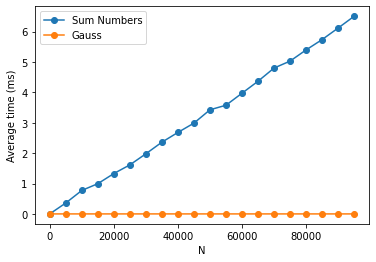

In [5]:
plt.plot(N_range, time_sum, 'o-', label='Sum Numbers')
plt.plot(N_range, time_gauss, 'o-', label='Gauss')
plt.xlabel('N')
plt.ylabel('Average time (ms)')
plt.legend();

## 계산 복잡도 (Computational Complexity)

데이터 과학자로서 발견할 수 있는 일반적인 문제의 한 버전을 해결해보겠습니다. 과연 데이터를 어떻게 저장해야 할까요? 만약 우리의 데이터가 숫자 목록이며, 이를 리스트에 저장해야 한다고 해보겠습니다. 이런 경우, 우리는 어떻게 스토리지를 최적화할 수 있을까요?

리스트를 사용해 작업을 수행하고자 할 때의 몇 가지 상충관계에 대해 생각해보겠습니다.

### 요소를 찾는 일 (Finding an element)

리스트에서 요소를 찾고 싶은데 해당 리스트에 대해 아무것도 알지 못하는 경우 우리는 어쩔 수 없이 리스트의 모든 요소를 ​​확인하여 해당 요소가 있는지 확인해야 합니다. 아래에 이를 수행하는 함수를 작성해 보겠습니다.

In [6]:
def find_ele(list_, ele):
    for i in list_:
        if i == ele:
            return True
    return False

이를 테스트하기 위해 `random` 모듈을 사용하여 $0$에서 $10 * N$ 사이의 난수 목록을 생성합니다. 여기서 $N$은 원하는 리스트의 길이입니다.

In [7]:
import random
def random_list(N, sort=False):
    list_ = [random.randint(0, 10*N) for _ in range(N)]
    return sorted(list_) if sort else list_

In [8]:
random_list(5)

[22, 20, 24, 27, 5]

In [9]:
import numpy as np

def time_func(func, *args):
    ts = time.time()
    func(*args)
    return time.time() - ts

def compute_with_list(n_avgs, N, sort, *funcs):
    ans = []
    for _ in range(n_avgs):
        list_r = random_list(N, sort)
        n_to_find = random.randint(0, 10*N)
        ans.append([time_func(func, list_r, n_to_find)
                for func in funcs])
    # now find avg
    return np.array(ans).mean(axis=0)*1000
    

n_avgs = 40
N_range = range(10, 100000, 10000)
time_list = np.array([compute_with_list(n_avgs, N, False, find_ele) for N in N_range])

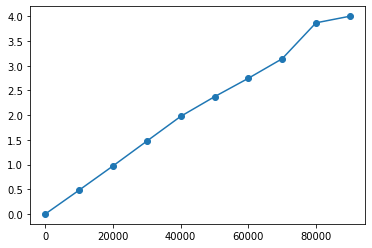

In [10]:
plt.plot(N_range, time_list, 'o-');

이 목록이 만약 정렬되었다는 것을 알고 있다고 가정할 때, 우리는 약간 다른 접근 방식을 취할 수도 있습니다. 정렬 자체는 $N\log(N)$ 복잡성이므로 정렬된 리스트에 대해 최적화된 검색을 수행할 수 있지만, 일반적으로 정렬한 다음 요소를 찾는 것이 더 빠르지는 않습니다. 그러나 자주 검색할 것이라는 것을 우리가 알고 있다면, 리스트를 정렬된 구조로 작성할 수 있으며 지금은 이미 그렇게 했다고 가정해보겠습니다.

우리가 수행할 수 있는 가장 기본적인 최적화는 우리가 찾고 있는 것보다 더 큰 숫자를 볼 때까지만 확인하는 것입니다. 즉, 리스트가 정렬되어 있다는 것을 이미 알고 있기 때문에, 리스트의 나머지 부분에서는 숫자가 없을 것이라는 것이 보장됩니다.

In [11]:
def find_ele_sorted(list_, ele):
    for i in list_:
        if i == ele:
            return True
        if i > ele:
            return False
    return False

n_avgs = 40
N_range = range(10, 100000, 10000)
time_list = np.array([compute_with_list(n_avgs, N, True, find_ele, find_ele_sorted) for N in N_range])

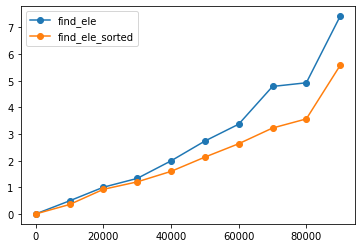

In [12]:
plt.plot(N_range, time_list[:,0], 'o-', label='find_ele')
plt.plot(N_range, time_list[:,1], 'o-', label='find_ele_sorted')
plt.legend();

정렬을 사용하는 것은 평균적으로 더 나은 방법이지만 이는 여전히 동일한 $O(N)$ 런타임을 갖습니다. 이러한 최적화는 유용합니다. 하지만 이보다 더 나은 방법이 있습니다. 바이너리 검색(**binary search**)이라고 하는 것을 구현할 수 있기 때문입니다. 이것은 각 재귀 단계에서 리스트를 대략 반으로 나눌 수 있는 재귀 알고리즘이며, 이는 로그 점근적 실행 시간을 산출합니다. 먼저 `l_=[1,2,3,4,5,6,7,8,9,10,11]`인 예제를 통해 알고리즘을 설명하고 리스트에 2가 포함되어 있는지 확인하려고 합니다. .

먼저 리스트의 중간지점인 6을 확인합니다. 2가 6과 같지 않다는 것을 알고 있지만 리스트가 정렬되어 있으므로 리스트에서 6보다 큰 숫자를 포함하는 부분은 즉시 배제할 수 있습니다. 따라서 우리는 이미 리스트 요소의 절반을 제거할 수 있습니다.

이제 리스트 `[1,2,3,4,5]`에 2가 포함되어 있는가를 질문할 수 있습니다. 또다시 리스트의 중간 요소인 3을 확인합니다. 3이 2가 아니라는 것을 알고 있기 때문에 $3>2$이므로 리스트의 절반을 제거할 수 있습니다.

다음으로 리스트 `[1,2]`에 2가 포함되어 있는지를 확인할 수 있습니다. 이 리스트의 중간점은 `1`의 인덱스 값을 갖는 사용합니다($len(list)/2=1$이기 때문에). 이것은 2와 같습니다. 따라서 2는 원래의 리스트에 존재합니다.

매번 리스트의 절반을 제거하기 때문에 단계 수는 대략 $log(N)$가 될 것으로 예상됩니다. 여기서 로그는 밑이 2인 것으로 이해됩니다. 이 함수를 $N$와 비교하여 도표를 만들어 보겠습니다.

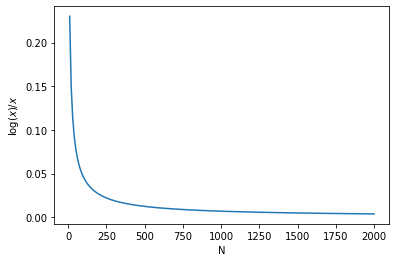

In [13]:
x = np.linspace(10, 2000, 200)
plt.plot(x, np.log(x)/x)
plt.xlabel('N')
plt.ylabel(r'$\log(x)/x$');

이제 이를 다른 검색 알고리즘과 비교해보겠습니다.

In [14]:
def find_ele_binary(l_, ele):
    if len(l_) < 1:
        return False
    mid_point = len(l_)//2
    if l_[mid_point] == ele:
        return True
    elif l_[mid_point] > ele:
        return find_ele_binary(l_[:mid_point], ele)
    else:
        return find_ele_binary(l_[mid_point+1:], ele)

In [15]:
n_avgs = 50
N_range = np.arange(1000, 70000, 8000)
time_list = np.array([compute_with_list(n_avgs, N, True, find_ele_sorted, find_ele_binary) for N in N_range])

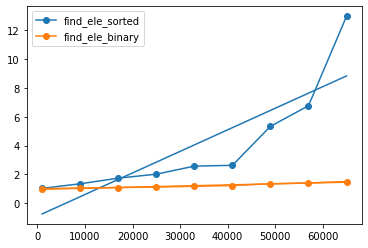

In [16]:
for i, func in enumerate(['find_ele_sorted', 'find_ele_binary']):
    l, = plt.plot(N_range, 2**time_list[:, i], 'o-', label=func)
    # fit a line to the exponent
    p = np.polyfit(N_range, 2**time_list[:, i], 1)
    plt.plot(N_range, N_range * p[0] + p[1], color=l.get_color())

plt.legend();

## 메모이제이션 (Memoization)

종종 우리는 이미 계산한 것을 다시 계산하지 않음으로써 성능 향상을 얻을 수도 있습니다. 이전 시간에 다루었던 재귀적 피보나치 수열을 다시 살펴보겠습니다.

In [17]:
def fibonacci_recursive(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fibonacci_recursive(n-1)  + fibonacci_recursive(n-2)

각 요소에서 함수를 호출한 횟수를 추적하는 새로운 함수를 만들어 보겠습니다.

In [18]:
from collections import defaultdict
def fibonacci_count(n, d):
    d[n] += 1
    if n == 0:
        return 0, d
    elif n == 1:
        return 1, d
    else:
        n1, _ = fibonacci_count(n-1, d)
        n2, _ = fibonacci_count(n-2, d)
        return n1 + n2, d

$N=5$에 대해 동작하는 것을 확인해 보겠습니다.

In [19]:
N = 5
ans, d = fibonacci_count(N, defaultdict(int))
for i in range(N):
    print(i, d[i])

0 3
1 5
2 3
3 2
4 1



              5
          4       3
         3 2     2 1
       2 1 1 0  1 0
      1 0

이제 $N=25$일 때입니다.

In [20]:
N = 25
ans, d = fibonacci_count(N, defaultdict(int))
print(ans)
for i in range(N):
    print(i, d[i])

75025
0 46368
1 75025
2 46368
3 28657
4 17711
5 10946
6 6765
7 4181
8 2584
9 1597
10 987
11 610
12 377
13 233
14 144
15 89
16 55
17 34
18 21
19 13
20 8
21 5
22 3
23 2
24 1


동일한 인수에 대해 함수를 수천 번 호출하고 있음에 주목해야 합니다. 이런한 상황에서 만약 문제에 대한 답을 계산하는 대신 이를 메모리에 저장해놓는다면, 과연 더 빠르게 문제를 풀 수 있을까요?

In [21]:
def fibonacci_mem(n, d):
    if n in d:
        return d[n]
    elif n == 0:
        ans = 0
    elif n == 1:
        ans = 1
    else:
        ans = fibonacci_mem(n-1, d) + fibonacci_mem(n-2, d)
    d[n] = ans
    return ans

In [22]:
%%timeit
fibonacci_mem(33, {0:0,1:1})

100000 loops, best of 5: 15.1 µs per loop


In [23]:
%%timeit
fibonacci_recursive(33)

1 loop, best of 5: 1.86 s per loop


In [24]:
fibonacci_mem(33, {}) == fibonacci_recursive(33)

True

메모이제이션을 사용한 솔루션이 훨씬 더 빠른 것을 볼 수 있습니다. 이는 단순한 재귀 솔루션에 비해 몇 배 더 빠릅니다. 하지만 문제는 비용이 든다는 것입니다. 계산량을 절약하더라도 이전 결과를 저장하기 위해서는 더 많은 메모리를 사용해야 합니다. 그렇기 때문에 계산 복잡도와 메모리 니즈에는 자연스럽게 상충관계가 존재합니다.

## 결론: 데이터 구조를 현명하게 선택할 것

정렬 섹션에서 알 수 있듯이 우리가 사용하는 데이터 구조의 유형은 종종 알고리즘 선택과 관련이 있습니다. 예를 들어, 정렬된 데이터가 아직 없다면 이진 검색을 사용하고 싶지 않을 것입니다. 바이너리 검색을 위해서는 먼저 데이트를 정렬해야 하는데 그렇게 된다면 이는 바이너리 검색으로 인한 알고리즘의 향상을 무효화시키기 때문입니다. (정렬은 $O(N)$보다 나쁩니다.)

결국 각각의 데이터 구조는 각각의 알고리즘 목적에 따라 부합하기도 하고 그렇지 않기도 합니다. 그렇기 때문에 알고리즘의 목적에 따라 적절한 데이터 구조를 선택하는 것일 필요합니다.

*Copyright 2021.* 퀀트대디. *This content is licensed solely for personal use. Redistribution or publication of this material is strictly prohibited.*